In [104]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# enable latex plotting 
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [105]:
qual_results = pd.read_csv("../data/qual_results_aug19.csv")

In [106]:
qual_results['Q10']

0                    Your name:
1     {"ImportId":"QID10_TEXT"}
2                        test 1
3                      Dave Dey
4                 Tauhid Tanjim
5     Andres Felipe Arias-Russi
6           Ethan Matthew Carty
7                  Ruixiang Han
8                 Tauhid Tanjim
9              Amritansh Kwatra
10                  Raymond Lin
11                          NaN
12                          NaN
13                          NaN
14                          NaN
15                          NaN
16                  Shannon Liu
17               Hauke Sandhaus
18          Ethan Matthew Carty
19              Daniel Enriquez
20               Tauhid Tanjim 
21                   Shuo Feng 
22                    Zhuoqi Xu
23               Sophie Lanchez
24                          NaN
25                  Ritik Batra
26                  Cathy zhang
27           Ananya Devarakonda
28                  Leihao Fang
29                   Joy zhang 
30                          NaN
31      

In [107]:
qual_results.iloc[9,:].values

array(['2024-08-13 08:50:19', '2024-08-13 10:52:39', 'IP Address',
       '*******', '100', '7340', 'True', '2024-08-13 10:52:41',
       'R_1cc6VzKGWd6FwF3', '*******', '*******', '*******', '*******',
       '*******', '*******', 'anonymous', 'EN', 'Kyon', '20240813',
       'F_2xDy8qlsKFIa1lI', 'signature.png', '7503', 'image/png', 'Yes',
       'Yes, with anonymization', 'Yes', 'Amritansh Kwatra',
       'F_5nkK0otCTwJaNmV', 'signature.png', '5719', 'image/png',
       'E-Bike,E-Scooter', nan, 'Almost every day',
       'A cell phone in a pocket or bag,Headphones with inline controls',
       nan,
       'Using a navigation app such as Google or Apple Maps,Controlling audio playback or track selection for music or podcasts,Communicating via text or messaging apps,Speaking on the phone',
       nan, 'About half the time', '26', 'Man', nan, 'Not at all', 'No',
       nan, nan, '7', '2', '3', '2', '2', '5', 'They practiced a little',
       'No', nan, nan, '5', '5', '3', '2', '4', '4'

In [108]:
col_names = qual_results.iloc[0,:]

In [109]:
qual_results = qual_results.iloc[2:, :]

In [110]:
# get average of every col with Q35* 
q35 = qual_results.filter(regex='Q35_*')
q35 = q35.dropna().astype(int) 
# drop row index 2 
# test user 
q35 = q35.drop(2)
# Dave Dey
q35 = q35.drop(3)
q35 


,Q35_1,Q35_2,Q35_3,Q35_4,Q35_5,Q35_6
5,1,4,6,5,3,2
6,2,5,6,3,4,1
7,1,5,6,4,3,2
8,2,5,6,3,4,1
10,1,3,6,4,5,2
16,1,5,6,4,3,2
17,3,4,5,6,2,1
19,2,4,5,6,1,3
21,1,5,6,3,4,2
22,1,5,6,4,3,2


In [111]:
qual_results[qual_results.index.isin(q35.index)]['Q10']

5     Andres Felipe Arias-Russi
6           Ethan Matthew Carty
7                  Ruixiang Han
8                 Tauhid Tanjim
10                  Raymond Lin
16                  Shannon Liu
17               Hauke Sandhaus
19              Daniel Enriquez
21                   Shuo Feng 
22                    Zhuoqi Xu
23               Sophie Lanchez
25                  Ritik Batra
26                  Cathy zhang
27           Ananya Devarakonda
28                  Leihao Fang
29                   Joy zhang 
31               Tan Gemicioglu
Name: Q10, dtype: object

In [112]:
len(q35)

17

In [113]:
col_names.reset_index().to_csv("../data/qual_col_names.csv")

In [114]:
interface_order = ['Voice', 'Phone','Watch', 'Foot Button', 'Throttle', 'Button']

/tmp/ipykernel_2106173/3042311622.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(interface_order, fontsize=14)


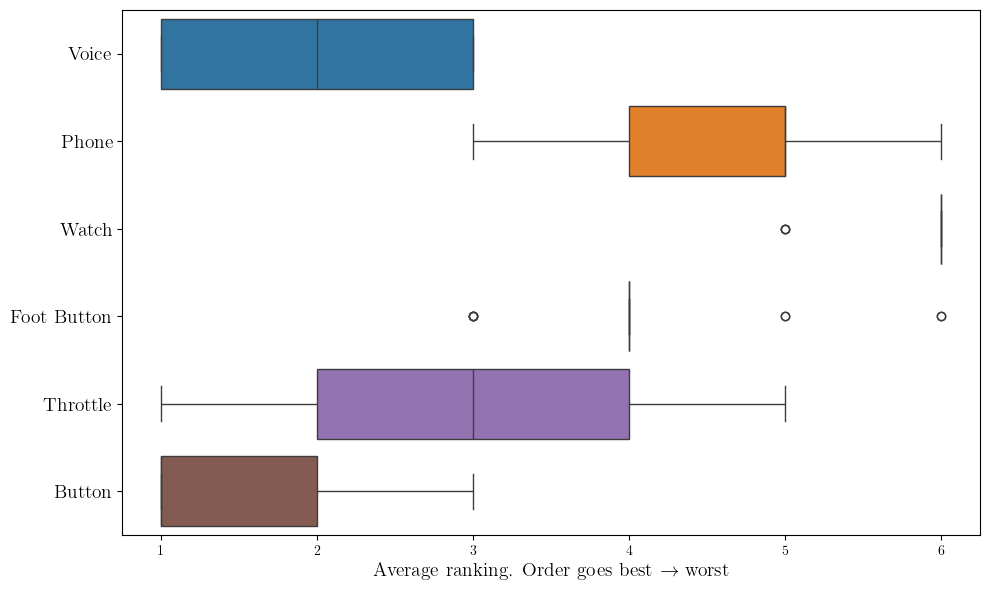

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming q35 is a DataFrame or Series
fig, ax = plt.subplots(figsize=(10, 6))

# Create a horizontal box plot
sns.boxplot(data=q35, orient='h', ax=ax)

# Set titles and labels
ax.set_xlabel(r"Average ranking. Order goes best $\rightarrow$ worst", fontsize=14)

# Use the interface_order to set the order of the interfaces
ax.set_yticklabels(interface_order, fontsize=14)



# Improve layout
plt.tight_layout()
plt.savefig("../figures/qual_results_ranking_boxplot.png", dpi=300)

In [ ]:
# population demographics 
# age q147  
# gender q149

# experience with riding 

In [155]:
ages = qual_results[qual_results.index.isin(q35.index)]['Q147']
ages = ages.dropna().astype(int)

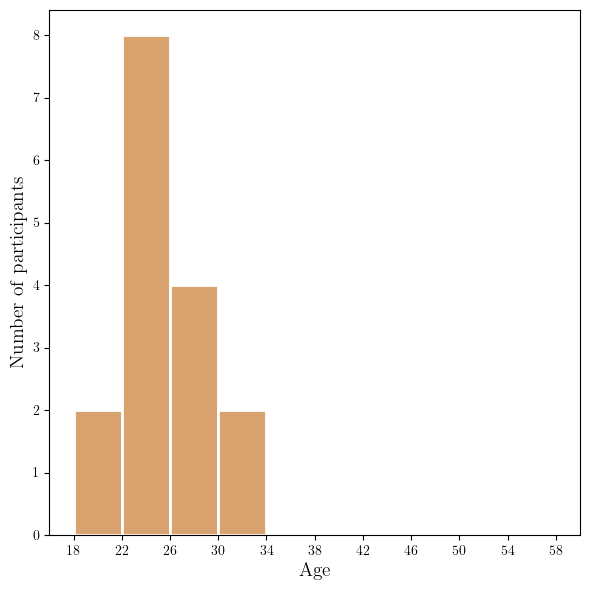

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
# Define the bin edges
bins = np.arange(18, 60, 4)  # Integer bin edges (e.g., 20, 27, 34, 41, 48)

# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histogram using seaborn
sns.histplot(ages, bins=bins, color='peru', edgecolor='white', linewidth=2, ax=ax)

# Set titles and labels
ax.set_xlabel(r"Age", fontsize=14)
ax.set_ylabel(r"Number of participants", fontsize=14)

# Set xticks at the integer bin edges
ax.set_xticks(bins)

# Remove gridlines
ax.grid(False)

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig("../figures/qual_results_age_hist.png", dpi=300)

plt.show()

In [163]:
gender = qual_results[qual_results.index.isin(q35.index)]['Q149']
gender = gender.dropna()

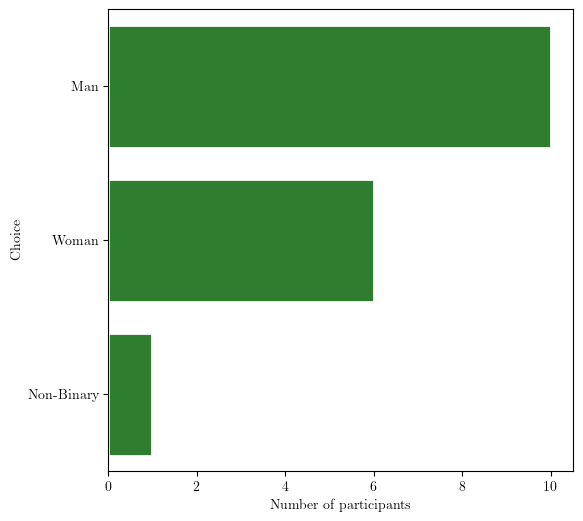

In [169]:
# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot histogram using seaborn
sns.countplot(gender, color='forestgreen', edgecolor='white', linewidth=2, ax=ax)

# Set titles and labels
ax.set_xlabel("Number of participants")
ax.set_ylabel("Choice")

# save
plt.savefig("../figures/qual_results_gender_hist.png", dpi=300, bbox_inches='tight')

In [170]:
# demand plots 
# use the preliinary run for each pariticapnt, without doing any NDRT as the baseline for a variant of the plot 

len(gender)


17